## Kallisto 설치 

Kallisto 를 다운로드받는다.  
https://pachterlab.github.io/kallisto/download.html

최신 버전의 실행 파일은 여기 존재한다. 

- Mac
https://github.com/pachterlab/kallisto/releases/download/v0.46.1/kallisto_mac-v0.46.1.tar.gz
- Windows
https://github.com/pachterlab/kallisto/releases/download/v0.46.1/kallisto_windows-v0.46.1.zip
- Linux
https://github.com/pachterlab/kallisto/releases/download/v0.46.1/kallisto_linux-v0.46.1.tar.gz

In [1]:
!curl -O  https://github.com/pachterlab/kallisto/releases/download/v0.46.1/kallisto_mac-v0.46.1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   638  100   638    0     0   1260      0 --:--:-- --:--:-- --:--:--  1258


자신의 홈 디렉토리에 kallisto 라는 디렉토리를 만들고, 여기에 kallisto 실행 파일을 옮기고 PATH를 설정한다. 

## SRA Toolkit

이미 공개된 NGS Sequence Data는 Sequence Read Archive (SRA)에 저장된다.   
https://www.ncbi.nlm.nih.gov/sra
    
SRA Archive에 있는 데이터를 변환하기 위해서는 SRA-Toolkit의 설치가 필요하다.  
https://github.com/ncbi/sra-tools/wiki/02.-Installing-SRA-Toolkit


다운로드받아 적절한 디렉토리에 압축을 푼 다음 다음과 같이 .bashrc (혹은 .zshrc)에서 PATH를 설정하자. 


>export SRA=/Users/suknamgoong/sratoolkit.2.10.5-mac64/bin
>export KALLISTO=/Users/suknamgoong/kallisto
>....
>export $SRA:$KALLISTO:$PATH


## 데이터 다운로드

오늘 받을 데이터는 다음과 같은 데이터이다. 
https://www.ncbi.nlm.nih.gov/sra?term=SRP252836
    
Arabidopsis Thaliana 의 잎에 H2O2, water, Nacl, H2O2+NaCl 을 친 후 Transcriptome의 변화를 3반복을 수행함. 

#### Control  
https://sra-download.ncbi.nlm.nih.gov/traces/sra58/SRR/011043/SRR11308188   
https://sra-download.ncbi.nlm.nih.gov/traces/sra58/SRR/011043/SRR11308187   
https://sra-download.ncbi.nlm.nih.gov/traces/sra60/SRR/011043/SRR11308184   
    
#### NaCl  
https://sra-download.ncbi.nlm.nih.gov/traces/sra61/SRR/011043/SRR11308181   
https://sra-download.ncbi.nlm.nih.gov/traces/sra61/SRR/011043/SRR11308182   
https://sra-download.ncbi.nlm.nih.gov/traces/sra58/SRR/011043/SRR11308183   

#### H2O2  
https://sra-download.ncbi.nlm.nih.gov/traces/sra37/SRR/011043/SRR11308178   
https://sra-download.ncbi.nlm.nih.gov/traces/sra58/SRR/011043/SRR11308179   
https://sra-download.ncbi.nlm.nih.gov/traces/sra61/SRR/011043/SRR11308180   

#### H2O2 + NaCl
https://sra-download.ncbi.nlm.nih.gov/traces/sra60/SRR/011043/SRR11308177   
https://sra-download.ncbi.nlm.nih.gov/traces/sra61/SRR/011043/SRR11308185  
https://sra-download.ncbi.nlm.nih.gov/traces/sra51/SRR/011043/SRR11308186   

이 데이터를 curl 을 이용하여 다운받자. 


## 데이터 변환

SRA 파일을 다운로드 받은 뒤에는 이를 FASTq 형식의 파일로 변환하여야 한다. 
SRA-Toolkit가 설치되어 있는 상황에서는 다음과 같은 명령으로 파일을 FASTq 형식의 파일로 변환할 수 있다.  


>fasterq-dump SRR11308177 --split-files --threads 16

--threads는 자신의 컴퓨터의 코어 숫자에 맞추어서 조절하자. 

명령을 내리면 SRR11308177_1.fastq와 SRR11308177_2.fastq의 파일이 생성된다.  
이 파일의 처음 부분을 살펴보면..

>head SRR11308177_1.fastq

```
@SRR11308177.1 1 length=150
AATAGCCACATATTTCATGGAAAATCTCAGTTCATCAAAGGCCCAAAAAAGAACAAGTGCTAAAGCTGAACCACTACCTTTAGGCGATTAAGCTGCTGCACGTGGCTGGAGACCTCTAAGAGGGTTGAAGATAACACAGTCAATACGTCA
+SRR11308177.1 1 length=150
A-AAA-AFFJJ-A<FJJFJJFAJJJJJ-FJFFJ<J-FF<F-J<<FAJFJ<JJFF7FFJAJAFFAA-FJAFJJJ-<--AJFF<JJAJJFAAJF7F-FJF-A7FJJJ<77A-7<-7--7AAAAAF<---7-7777--A--7A---7A--7AF
@SRR11308177.2 2 length=150
GATGAGTTTGGAATTGGTACTCTTCGTTTGACCACAAGGCAGACGTTTCAGCTTCATGGTATTCTGAAGCAGAATCTTAAGACTGTGATGAGCTCGATTATTAAAAATATGGTGAGCACGCTTGGTGCATGTGGTGATGTAACGAGATAC
+SRR11308177.2 2 length=150
AAFAAA-<FAJ<FJJJJJFAJAFJFJJJFFFJ7JJFFJJF-FJJJJJJJ<J<FJ-FJJJF-<F-<F--FJFJJAA7AJJFF<AJ<AJJFAJJF<-JJ7FA--JJF<FJJJJJA-F<-7--7FJAFF--77A7----A----77-A---7-
@SRR11308177.3 3 length=150
CTTGAGTCTCAGTATCAATGTCATGTTTAATGCGCTGAGATTCTGAGAACATGTATGCCTTTTGACTGATGGTCTTCATTACATTTGCATACAGTTTTACGGCAGCTGGGTACTATGGATGAGGGGTGATCTTTTACTTACTAAGAATAC
```


이 데이터 내의 시퀀스 갯수는? 
>grep "@SRR11308177" SRR11308177_1.fastq | wc -l
```
5360140
```

약 260만 reads가 들어있음. 

동일한 방법으로 모든 SRR...파일을 fastaq로 변환하자. 
>fasterq-dump SRR11308178 --split-files --threads 16
>fasterq-dump SRR11308179 --split-files --threads 16
>....

## FASTQC로 변환한 fastaq 파일의 퀄리티 체크 

변환한 FASTQ를 FastQC (https://www.bioinformatics.babraham.ac.uk/projects/fastqc/) 를 이용하여 퀄리티를 체크해 보자.  시퀀스의 위치에 따라서 어떻게 퀄리티가 달라지는가? 



## Transcriptome Index 만들기 

Kallisto는 STAR등의 aligner와는 달리 Transcriptome에 직접 RNA-Seq Read를 매핑한다. (Pseudoalignments)  
따라서 Genome Sequence 대신 Transcriptome 을 이용하여 Index를 만들어야 한다.  

Arabidopsis의 모든 RNA가 있는 fasta 파일을 다운로드받자. 
https://ics.hutton.ac.uk/atRTD/
https://ics.hutton.ac.uk/atRTD/RTD2/AtRTD2_19April2016.fa


여기서 다음의 파일을 다운로드받자. 

In [1]:
!curl -O https://ics.hutton.ac.uk/atRTD/RTD2/AtRTD2_19April2016.fa
!curl -O https://ics.hutton.ac.uk/atRTD/RTD2/AtRTD2_19April2016.gtf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.5M  100 23.5M    0     0  2553k      0  0:00:09  0:00:09 --:--:-- 3916k


'TAIR10' 이라는 이름으로 서브디렉토리를 만들고, 파일을 여기로 옮긴다. 
해당 디렉토리로 이동한 다음...

다음 명령으로 Index를 구축한다. 
```
cd kalliso  
kallisto index AtRTD2_19April2016.fa -i TAIR10
```

TAIR10 이라는 이름으로 인덱스가 구축되었다. 
```
ls -l
total 2549448
-rw-r--r--@ 1 suknamgoong  staff   116987027  5 11 20:56 GCA_000001735.2_TAIR10.1_rna_from_genomic.fna
-rw-r--r--@ 1 suknamgoong  staff  1182947849  5 11 21:06 TAIR10

Kallisto로 정량을 수행한다. 

정량을 수행하기 위해서는 
-i 옵션으로 방금 전에 만든 트랜스크립톰 인덱스의 위치 
-o 로 파일을 저장한 디렉토리 이름 
-b 는 bootstrapping parameters로써 정확한 Transcriptome의 정량에 필요한 파라메터이다. 

그리고 두 개(Paired End의 경우)의 fastq 파일 이름을 지정한다. 

```
kallisto quant -i ./TAIR10/TAIR10 -o quant8177 -b 5 SRR11308177_1.fastq SRR11308177_2.fastq  
kallisto quant -i ./TAIR10/TAIR10 -o quant8178 -b 5 SRR11308178_1.fastq SRR11308178_2.fastq  
....
```

이를 반복하여 SRR11308188...까지 정량을 수행한다.

정량이 완료되면 각각의 디렉토리에는 다음과 같은 내용물이 저장된다. 

```
$ ls
abundance.h5             pseudoalignments.bam     run_info.json
abundance.tsv            pseudoalignments.bam.bai
```

(pseudoalignments 관련 파일은 --genomebam 옵션을 지정해야 생성된다. 
 이 파일은 지놈 브라우저로 alignment의 상태를 관찰할 때 사용한다. 


## Differential Expression in Slueth

그렇다면 이제 무엇을 할 수 있는가?   
Kallisto와 같이 개발된 Slueth 라는 소프트웨어를 이용하여 조건에 따라서 다르게 발현되는 유전자를 찾아보도록 하자. 

이를 위해서는 꽤 많은 다른 소프트웨어를 설치해야 한다. 

- R : 많은 생물정보학 관련 분석에 사용되는 통계 패키지이다. 
https://cloud.r-project.org

- RStudio : R을 편리하게 사용할 수 있는 통합 개발환경이다. 
https://rstudio.com

![alt text][logo]

[logo]: https://d33wubrfki0l68.cloudfront.net/3424b5c8effdf253e54da0fd4b1f355e40615e64/16a6a/2019/03/14/rstudio-1-2-jobs/running-jobs.png "Logo Title Text 2"




RStudio에서 Github에 올려놓은 'SleuthInstall.R'을 불러오고, 이를 실행한다  
(메뉴의 Code-Run Region - Run All) 을 선택한다. 

```
install.packages("BiocManager")
BiocManager::install()
BiocManager::install(c("rhdf5"))
install.packages("devtools")
install.packages("rlang")
devtools::install_github("pachterlab/sleuth")
```

RStudio의 'Console' 화면에서 다음과 같이 slueth 를 불러왔을때 성공적으로 에러 없이 실행되면 설치 완료 

```
>library("slueth")
>
```

다음에는 Kallisto 로 정량한 파일과 샘플의 종류를 지정하는 텍스트 파일을 만들 차례이다.   
다음과 같은 텍스트 파일을 만든다. 

(GitHub의 Sample.tsv를 참조)
샘플 이름, 처리 조건, 샘플의 위치를 다음과 같이 적어준다. 

```
sample,condition,path
SRR11308188,Control,./quant8188
SRR11308187,Control,./quant8187
SRR11308184,Control,./quant8184
SRR11308181,NaCl,./quant8181
SRR11308182,NaCl,./quant8182
SRR11308183,NaCl,./quant8183
SRR11308178,H2O2,./quant8178
SRR11308179,H2O2,./quant8179
SRR11308180,H2O2,./quant8180
SRR11308177,NaClH2O2,./quant8177
SRR11308185,NaClH2O2,./quant8185
SRR11308186,NaClH2O2,./quant8186
```


다음은 유전자와 Transcripts 사이의 관계를 알려주는 데이터를 준비해야 한다.   
Kallisto의 index 에 사용한 Transcriptome file인 AtRTD2_19April2016.fa을 살펴보면 다음과 같이 되어 있다. 

```
>AT1G01010.1 gene=AT1G01010 CDS=130-1419
AAATTATTAGATATACCAAACCAGAGAAAACAAATACATAATCGGAGAAATACAGATTACAGAGAGCGAG
AGAGATCGACGGCGAAGCTCTTTACCCGGAAACCATTGAAATCGGACGGTTTAGTGAAAATGGAGGATCA
AGTTGGGTTTGGGTTCCGTCCGAACGACGAGGAGCTCGTTGGTCACTATCTCCGTAACAAAATCGAAGGA
AACACTAGCCGCGACGTTGAAGTAGCCATCAGCGAGGTCAACATCTGTAGCTACGATCCTTGGAACTTGC
GCTTCCAGTCAAAGTACAAATCGAGAGATGCTATGTGGTACTTCTTCTCTCGTAGAGAAAACAACAAAGG
GAATCGACAGAGCAGGACAACGGTTTCTGGTAAATGGAAGCTTACCGGAGAATCTGTTGAGGTCAAGGAC
CAGTGGGGATTTTGTAGTGAGGGCTTTCGTGGTAAGATTGGTCATAAAAGGGTTTTGGTGTTCCTCGATG
GAAGATACCCTGACAAAACCAAATCTGATTGGGTTATCCACGAGTTCCACTACGACCTCTTACCAGAACA
TCAGAGGACATATGTCATCTGCAGACTTGAGTACAAGGGTGATGATGCGGACATTCTATCTGCTTATGCA
```

><Transcript의 이름> <gene=유전자의 이름> 

이 정보에서 Transcript와 유전자 이름만을 추출하여 Transcript 이름 = 유전자의 관계를 알려주는 데이터를 만들어야 한다.   
'>'로 시작되는 헤더만을 추출하기 위하여 다음의 명령을 내린다. 

```
grep ">" AtRTD2_19April2016.fa > gene
head gene
>AT1G01010.1 gene=AT1G01010 CDS=130-1419
>AT1G01020_P2 gene=AT1G01020 CDS=72-647
>AT1G01020_P6 gene=AT1G01020 CDS=190-504
>AT1G01020_P1 gene=AT1G01020 CDS=465-1202
>AT1G01020_P3 gene=AT1G01020 CDS=583-1293
>AT1G01020_P4 gene=AT1G01020 CDS=560-1270
>AT1G01020_P5 gene=AT1G01020 CDS=583-1179
>AT1G01030.1 gene=AT1G01030 CDS=614-1690
....
```

이 데이터를 파이썬에서 읽어들인다. 

In [6]:
import pandas as pd 

data = pd.read_csv('./TAIR10/gene',sep=" ", header=None)
data.columns=["target_id","gene",""]
data["target_id"]=data["target_id"].str.replace(">","")
data["gene"]=data["gene"].str.replace("gene=","")
data.drop(columns="",inplace=True)
data.to_csv("gene_transcript.txt")
data

,target_id,gene
0,AT1G01010.1,AT1G01010
1,AT1G01020_P2,AT1G01020
2,AT1G01020_P6,AT1G01020
3,AT1G01020_P1,AT1G01020
4,AT1G01020_P3,AT1G01020
...,...,...
82185,ATMG01380.1,ATMG01380
82186,ATMG01390.1,ATMG01390
82187,ATMG01400.1,ATMG01400
82188,ATMG01410.1,ATMG01410


```
head gene_transcript.txt
,target_id,gene
0,AT1G01010.1,AT1G01010
1,AT1G01020_P2,AT1G01020
2,AT1G01020_P6,AT1G01020
3,AT1G01020_P1,AT1G01020
4,AT1G01020_P3,AT1G01020
5,AT1G01020_P4,AT1G01020
6,AT1G01020_P5,AT1G01020
7,AT1G01030.1,AT1G01030
8,AT1G01030_P2,AT1G01030
```

이 파일이 모두 준비된 다음에는 RStudio에서 Sleuth.R 파일(GitHub에 올라와 있음)을 불러서 실행한다. 

```
setwd('~/data')
library("sleuth")
s2c <- read.csv(file.path("sample.tsv"),
                  header = TRUE,
                  stringsAsFactors = FALSE)
gene <-read.csv(file.path("gene_transcript.txt"))
ttg <- dplyr::select(gene,c("target_id","gene"))
so <- sleuth_prep(s2c, extra_bootstrap_summary = TRUE, target_mapping=ttg,
                  aggregation_column="gene")
so <- sleuth_fit(so, ~condition, 'full')
so <- sleuth_fit(so, ~1, 'reduced')
so <- sleuth_lrt(so, 'reduced', 'full')
sleuth_table <- sleuth_results(so, 'reduced:full', 'lrt', show_all = FALSE)
write.csv(sleuth_table, file="sleuth.csv")
```


이 작업이 끝나면 sleuth.csv 에 Differentially Expressed Gene의 목록이 저장된다. 
RStudio의 Console 창에서 다음 명령을 내리면 

sleuth_live(so)
기본적인 데이터에 대한 시각화를 할 수 있다. 

우리는 파이썬을 이용하고 있으므로, 데이터의 분석은 주로 Python에서 수행할 것이다. 

In [5]:
#slueth.csv를 읽어보고 

import pandas as pd
sleuth = pd.read_csv('sleuth.csv')
sleuth

,Unnamed: 0,target_id,num_aggregated_transcripts,sum_mean_obs_counts,pval,qval
0,1,AT1G54100,3,17.669053,4.569957e-30,8.570955e-26
1,2,AT5G20250,5,21.357616,3.970350e-28,3.723195e-24
2,3,AT2G39800,5,23.827147,1.173651e-25,7.337276e-22
3,4,AT3G48360,7,30.215180,2.200236e-21,1.031636e-17
4,5,AT1G28330,5,23.610093,1.096445e-20,4.112764e-17
...,...,...,...,...,...,...
18750,18751,AT4G20040,1,1.321590,1.000000e+00,1.000000e+00
18751,18752,AT4G23200,1,1.512674,1.000000e+00,1.000000e+00
18752,18753,AT5G38040,1,2.287300,1.000000e+00,1.000000e+00
18753,18754,AT5G45730,1,1.060722,1.000000e+00,1.000000e+00


p-value는 Differential expression의 p-values이며, sum_mean_obs_counts는 해당 유전자를 구성하는 Transcripts 의 유전자 발현 수치의 정량치이다. 

In [6]:
#Sample군 사이에서 differential expression이 가장 많이 된 유전자 200개 
sleuth[0:200]

,Unnamed: 0,target_id,num_aggregated_transcripts,sum_mean_obs_counts,pval,qval
0,1,AT1G54100,3,17.669053,4.569957e-30,8.570955e-26
1,2,AT5G20250,5,21.357616,3.970350e-28,3.723195e-24
2,3,AT2G39800,5,23.827147,1.173651e-25,7.337276e-22
3,4,AT3G48360,7,30.215180,2.200236e-21,1.031636e-17
4,5,AT1G28330,5,23.610093,1.096445e-20,4.112764e-17
...,...,...,...,...,...,...
195,196,AT3G58120,2,7.339968,1.794040e-11,1.716695e-09
196,197,AT5G56870,2,9.263291,1.810784e-11,1.723921e-09
197,198,AT4G16590,1,5.031361,1.871280e-11,1.766415e-09
198,199,AT5G24780,2,10.864826,1.874255e-11,1.766415e-09


In [7]:
#각각의 샘플에서의 유전자 발현 수준을 알아보기 위하여 Kallisto에서 나온 정량값을 읽어 보자. 

#샘플이 들어 있는 디렉토리 목록을 리스트로 만들고 
directorylist=['quant8177',
      'quant8178',
      'quant8179',
      'quant8180',
      'quant8181',
      'quant8182',
      'quant8183',
      'quant8184',
      'quant8185',
      'quant8186',
      'quant8187',
      'quant8188']

#각각의 디렉토리에 있는 abundance.tsv내용을 데이터프레임으로 읽어 abundances라는 딕셔너리에 넣는다. 
abundances = {}
for directory in directorylist:
    abundances[directory]=pd.read_csv('./'+directory+'/abundance.tsv',sep="\t")

In [8]:
abundances['quant8177']

,target_id,length,eff_length,est_counts,tpm
0,AT1G01010.1,1688,1364.3600,40.00000,6.107500
1,AT1G01020_P2,1087,763.3640,18.41750,5.026110
2,AT1G01020_P6,944,620.3950,2.49055,0.836296
3,AT1G01020_P1,1329,1005.3600,8.41777,1.744240
4,AT1G01020_P3,1420,1096.3600,1.93682,0.368017
...,...,...,...,...,...
82185,ATMG01380.1,118,53.6596,0.00000,0.000000
82186,ATMG01390.1,1935,1611.3600,144.00000,18.616700
82187,ATMG01400.1,318,51.2179,0.00000,0.000000
82188,ATMG01410.1,615,292.0970,0.00000,0.000000


In [9]:
#전체 데이터를 하나로 합친다. 
#expression data 중에서 tpm 만을 가져온다. 

ab = []
for key,values in abundances.items():
    temp = values[['target_id','tpm']]
    temp['sample']=key
    ab.append(temp)

est_counts = pd.concat(ab)

est_counts

/Users/suknamgoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,target_id,tpm,sample
0,AT1G01010.1,6.107500,quant8177
1,AT1G01020_P2,5.026110,quant8177
2,AT1G01020_P6,0.836296,quant8177
3,AT1G01020_P1,1.744240,quant8177
4,AT1G01020_P3,0.368017,quant8177
...,...,...,...
82185,ATMG01380.1,3.412950,quant8188
82186,ATMG01390.1,33.295200,quant8188
82187,ATMG01400.1,0.000000,quant8188
82188,ATMG01410.1,0.000000,quant8188


In [10]:
#Transcript 이름을 유전자의 이름으로 변환한다. 
est_counts['gene']=est_counts['target_id'].str.split(r'\.|\_').str[0]
est_counts

,target_id,tpm,sample,gene
0,AT1G01010.1,6.107500,quant8177,AT1G01010
1,AT1G01020_P2,5.026110,quant8177,AT1G01020
2,AT1G01020_P6,0.836296,quant8177,AT1G01020
3,AT1G01020_P1,1.744240,quant8177,AT1G01020
4,AT1G01020_P3,0.368017,quant8177,AT1G01020
...,...,...,...,...
82185,ATMG01380.1,3.412950,quant8188,ATMG01380
82186,ATMG01390.1,33.295200,quant8188,ATMG01390
82187,ATMG01400.1,0.000000,quant8188,ATMG01400
82188,ATMG01410.1,0.000000,quant8188,ATMG01410


In [12]:
#만약 특정한 유전자를 구성하는 Transcripts의 발현만을 얻고 싶으면 
AT1G54100 = est_counts[est_counts['gene']=='AT1G54100']
AT1G54100

,target_id,tpm,sample,gene
13566,AT1G54100_P2,66.76830,quant8177,AT1G54100
13567,AT1G54100_P1,139.79000,quant8177,AT1G54100
13568,AT1G54100_JC2,57.52080,quant8177,AT1G54100
13566,AT1G54100_P2,5.56788,quant8178,AT1G54100
13567,AT1G54100_P1,44.11500,quant8178,AT1G54100
13568,AT1G54100_JC2,0.00000,quant8178,AT1G54100
13566,AT1G54100_P2,7.58315,quant8179,AT1G54100
13567,AT1G54100_P1,51.40400,quant8179,AT1G54100
13568,AT1G54100_JC2,0.00000,quant8179,AT1G54100
13566,AT1G54100_P2,9.10282,quant8180,AT1G54100


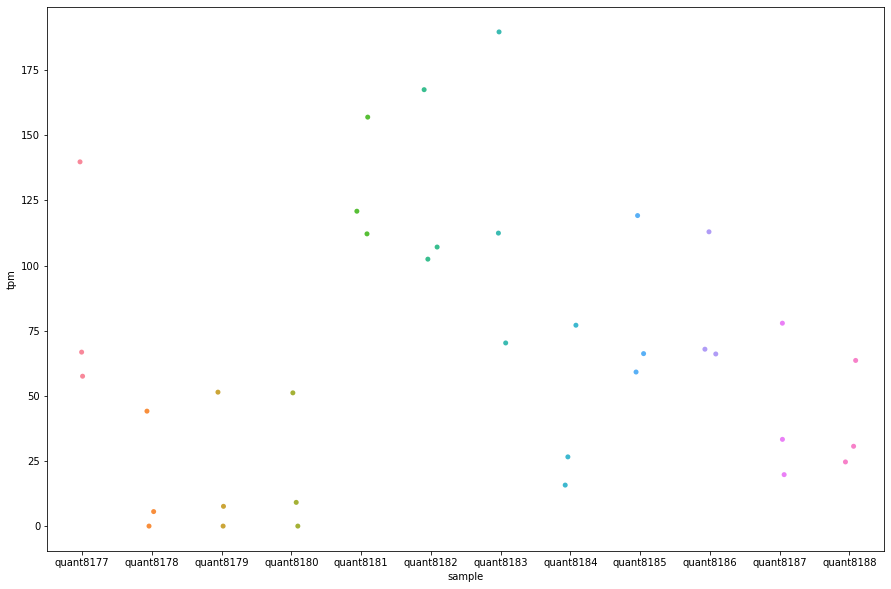

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.stripplot(data=AT1G54100, y='tpm',x='sample')

유전자 수준으로 발현을 보기 위하여 특정한 유전자에 해당하는 모든 Transcripts의 발현을 더한다. 

In [20]:
AT1G = AT1G54100.groupby(['gene','sample'])['tpm'].sum().reset_index()

,gene,sample,tpm
0,AT1G54100,quant8177,264.07910
1,AT1G54100,quant8178,49.68288
2,AT1G54100,quant8179,58.98715
3,AT1G54100,quant8180,60.23782
4,AT1G54100,quant8181,389.95200
5,AT1G54100,quant8182,377.03500
6,AT1G54100,quant8183,372.39180
7,AT1G54100,quant8184,119.39150
8,AT1G54100,quant8185,244.49740
9,AT1G54100,quant8186,246.88890


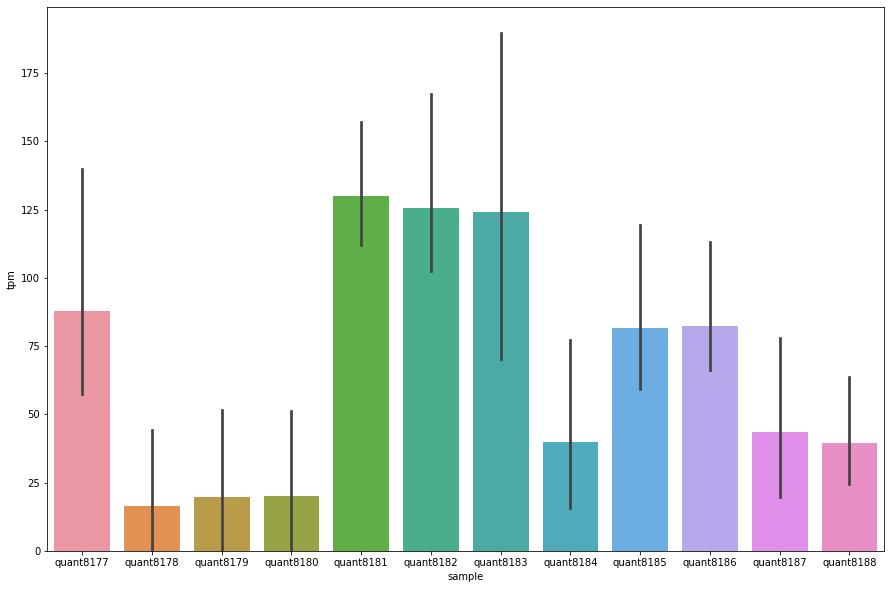

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(data=AT1G54100, y='tpm',x='sample')

In [23]:
#Differential Expression 상위 500개 유전자에 대한 분석을 수행해 보자. 
#일단 전체 Transcripts의 발현 수준을 유전자 수준으로 합친다. 
gene = est_counts.groupby(['gene','sample'])['tpm'].sum().reset_index()

In [24]:
gene

,gene,sample,tpm
0,AT1G01010,quant8177,6.107500
1,AT1G01010,quant8178,5.498340
2,AT1G01010,quant8179,5.357620
3,AT1G01010,quant8180,5.742930
4,AT1G01010,quant8181,6.596350
...,...,...,...
410539,ATMG01410,quant8184,0.000000
410540,ATMG01410,quant8185,0.521050
410541,ATMG01410,quant8186,0.000000
410542,ATMG01410,quant8187,0.340124


In [46]:
#유전자 발현을 행 : 유전자, 열 : 샘플 형식의 매트릭스로 바꾼다. 

matrix = gene.pivot(index='gene',columns='sample')
matrix

tpm                                                        \
sample     quant8177  quant8178 quant8179  quant8180  quant8181  quant8182   
gene                                                                         
AT1G01010   6.107500   5.498340   5.35762   5.742930   6.596350   6.005390   
AT1G01020   9.615463  12.629212  15.06502  10.863966   7.091868   6.654382   
AT1G01030   0.688727   1.216240   1.78674   0.947952   0.728679   0.610739   
AT1G01040   7.700740   7.910820   8.26413   8.266280   3.410558   6.566990   
AT1G01046  15.806200   0.000000   0.00000   0.000000   0.000000   7.001030   
...              ...        ...       ...        ...        ...        ...   
ATMG01370  32.101300  22.342200  56.40600  54.384900  39.028700  30.260600   
ATMG01380   0.000000   0.000000  12.40160   2.712350   0.000000   5.676540   
ATMG01390  18.616700  35.568700  22.59000  23.545900  26.383600  27.277400   
ATMG01400   0.000000   0.000000   3.06098   0.000000   0.000000   0.000000   
ATMG01410   0.000000   0.660512   1.68791   0.000000   0.818568   0.000000   

                                                                             
sample     quant8183  quant8184  quant8185  quant8186  quant8187  quant8188  
gene                                                                         
AT1G01010   6.427560   6.087060   4.775340   7.406960   5.579160   5.124500  
AT1G01020   8.489986   9.297207   5.930017   5.209469   7.875836   7.379233  
AT1G01030   0.736059   1.826274   1.079910   1.220580   1.583870   1.094054  
AT1G01040   5.920830   5.772987   5.863560   6.676730   3.956100   5.978130  
AT1G01046   3.487640   2.773220   0.000000   0.000000   0.000000   0.000000  
...              ...        ...        ...        ...        ...        ...  
ATMG01370  44.442100  42.493300  20.693200  49.765700  40.116800  39.668300  
ATMG01380   0.000000   5.809030   0.000000   3.280340   0.000000   3.412950  
ATMG01390  24.174400  24.969100  23.124700  22.075900  25.430600  33.295200  
ATMG01400   0.000000   0.000000   0.000000   0.000000   1.708790   0.000000  
ATMG01410   0.482912   0.000000   0.521050   0.000000   0.340124   0.000000  

[34212 rows x 12 columns]

In [28]:
#각각의 샘플간의 Expression의 Correlation을 구해보자.  
corr = matrix.corr()
corr

tpm                                                    \
sample        quant8177 quant8178 quant8179 quant8180 quant8181 quant8182   
    sample                                                                  
tpm quant8177  1.000000  0.955232  0.970170  0.957484  0.959099  0.946481   
    quant8178  0.955232  1.000000  0.979612  0.961605  0.948746  0.943951   
    quant8179  0.970170  0.979612  1.000000  0.994634  0.957539  0.955338   
    quant8180  0.957484  0.961605  0.994634  1.000000  0.945591  0.947739   
    quant8181  0.959099  0.948746  0.957539  0.945591  1.000000  0.993700   
    quant8182  0.946481  0.943951  0.955338  0.947739  0.993700  1.000000   
    quant8183  0.948709  0.944058  0.952078  0.942968  0.995777  0.997484   
    quant8184  0.966818  0.968984  0.983650  0.972625  0.967726  0.956799   
    quant8185  0.997649  0.955478  0.967800  0.951897  0.957984  0.942566   
    quant8186  0.999491  0.952705  0.970766  0.958666  0.958897  0.946486   
    quant8187  0.966580  0.968601  0.980018  0.966648  0.966025  0.951482   
    quant8188  0.967891  0.964599  0.980498  0.967979  0.965746  0.952038   

                                                                           
sample        quant8183 quant8184 quant8185 quant8186 quant8187 quant8188  
    sample                                                                 
tpm quant8177  0.948709  0.966818  0.997649  0.999491  0.966580  0.967891  
    quant8178  0.944058  0.968984  0.955478  0.952705  0.968601  0.964599  
    quant8179  0.952078  0.983650  0.967800  0.970766  0.980018  0.980498  
    quant8180  0.942968  0.972625  0.951897  0.958666  0.966648  0.967979  
    quant8181  0.995777  0.967726  0.957984  0.958897  0.966025  0.965746  
    quant8182  0.997484  0.956799  0.942566  0.946486  0.951482  0.952038  
    quant8183  1.000000  0.957855  0.943355  0.947506  0.952309  0.952811  
    quant8184  0.957855  1.000000  0.967823  0.967141  0.998534  0.998892  
    quant8185  0.943355  0.967823  1.000000  0.998260  0.970132  0.970763  
    quant8186  0.947506  0.967141  0.998260  1.000000  0.967225  0.968823  
    quant8187  0.952309  0.998534  0.970132  0.967225  1.000000  0.999199  
    quant8188  0.952811  0.998892  0.970763  0.968823  0.999199  1.000000

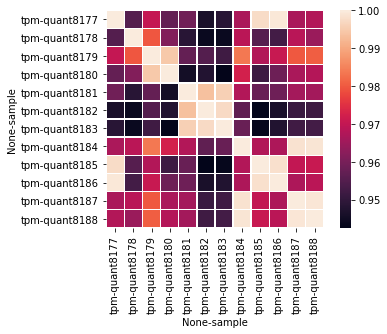

In [36]:
import numpy as np
sns.heatmap(corr,  square=True, linewidths=.5)

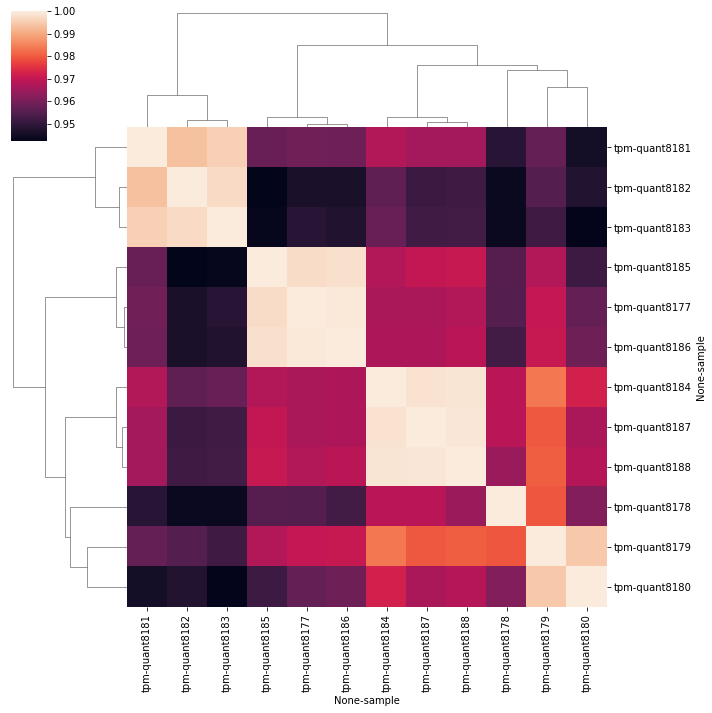

In [37]:
#같은 종류의 샘플끼리 그룹을 지을 수 있다. 
sns.clustermap(corr)

In [70]:

#top1000 differential expressed genes
top100 = matrix.loc[sleuth['target_id'][0:100].to_list()]
top100

tpm                                                   \
sample      quant8177   quant8178   quant8179   quant8180    quant8181   
gene                                                                     
AT1G54100  264.079100   49.682880   58.987150   60.237820   389.952000   
AT5G20250   18.444210  132.637100  156.001160  147.234940    75.656859   
AT2G39800  575.238109  168.423960  173.339720  170.013490  1615.678980   
AT3G48360   34.973809  474.860970  474.293680  400.502900   316.576542   
AT1G28330  155.558806  578.815600  442.263817  381.488408   903.186592   
...               ...         ...         ...         ...          ...   
AT4G27450   19.966300  170.202000  147.455000  136.166000   223.714000   
AT2G41190   75.276086    5.513360    5.414592    4.131790   117.335870   
AT4G01330   19.163284   55.361537   60.421174   55.818130    45.739097   
AT2G06850   69.414900  378.600580  333.720610  335.725309   147.233467   
AT3G26510   63.910185  258.066125  280.715870  283.311632   336.823475   

                                                                         \
sample       quant8182    quant8183   quant8184   quant8185   quant8186   
gene                                                                      
AT1G54100   377.035000   372.391800  119.391500  244.497400  246.888900   
AT5G20250    80.649774    72.543751  380.356210   19.344181   19.276482   
AT2G39800  1805.177200  1695.438210  220.235366  564.524210  573.599933   
AT3G48360   315.078720   332.253410  419.917210   25.564067   24.112958   
AT1G28330   772.873476   795.982110  957.120832  169.033215  163.119620   
...                ...          ...         ...         ...         ...   
AT4G27450   208.822000   201.683000  305.961000   21.520600   23.309800   
AT2G41190   144.794225   162.080419   15.419089   63.039320   66.131580   
AT4G01330    46.948900    45.719870   94.852330   15.343437   18.703839   
AT2G06850   158.106211   158.702046  519.596860   86.120200   74.911703   
AT3G26510   316.399190   314.240519  309.848370   53.458482   50.100761   

                                     
sample       quant8187    quant8188  
gene                                 
AT1G54100   130.905300   118.832300  
AT5G20250   384.144080   381.839497  
AT2G39800   217.153763   212.509390  
AT3G48360   367.684534   388.380940  
AT1G28330  1054.958886  1021.714400  
...                ...          ...  
AT4G27450   319.840000   306.213000  
AT2G41190    11.382757    13.927433  
AT4G01330    89.198953    88.714910  
AT2G06850   537.271779   523.912860  
AT3G26510   317.087049   322.739876  

[100 rows x 12 columns]

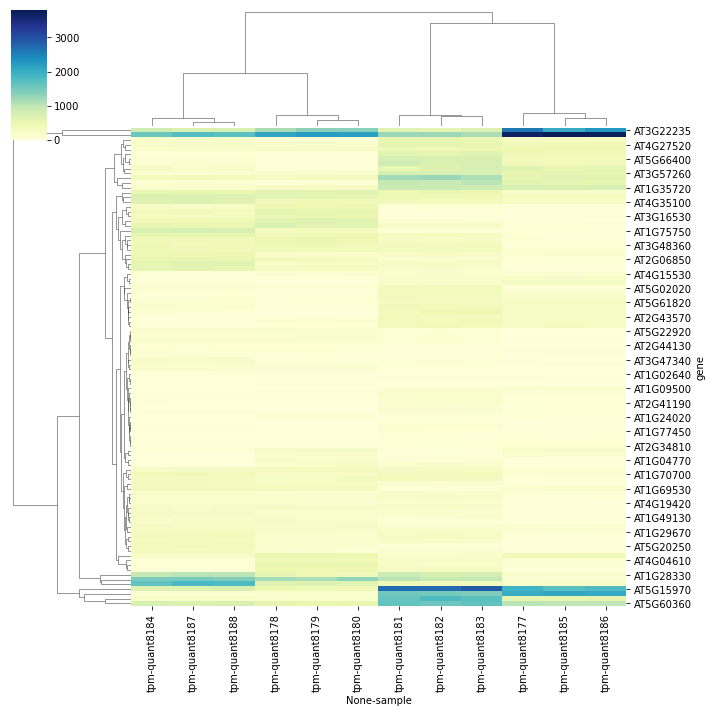

In [71]:
g=sns.clustermap(top100,cmap='YlGnBu')

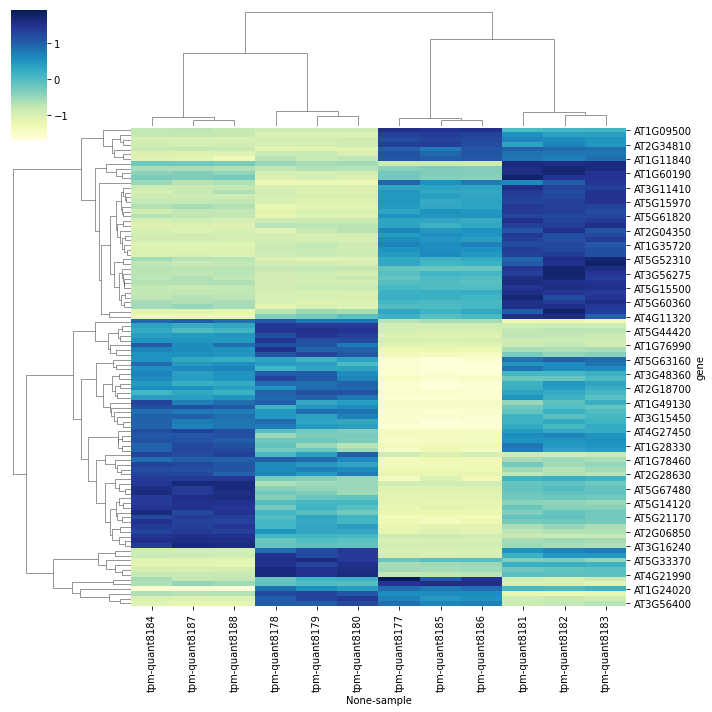

In [74]:
#너무 많이 expression된 몇몇 유전자 때문에 다른 유전자들의 변화가 잘 눈에 띄지 않는다. 
#데이터를 표준화하자. 
#각각의 샘플에서 샘플에서 평균 발현도를 0으로 설정하고 전체 발현 수준에서 평균을 빼 주어서 평균값이 0 에서 1,-1 에 분포하도록 한다. 

g=sns.clustermap(top100,z_score=0,cmap='YlGnBu')

In [ ]:
#각각의 샘플과 처리 조건을 보자. 
#NaCl 에 의해서 과발현되는 유전자와 적게 발현되는 유전자들은 어떤 것들인가? 
#H2O2 에 의해서 과발현되는 유전자와 적게 발현되는 유전자들은 어떤 것들인가? 

In [60]:
# 재배열된 순서를 받아오고 
row = g.dendrogram_row.reordered_ind
col = g.dendrogram_col.reordered_ind

t1000=top1000.to_numpy()
u = t1000[row,:][:,col]
index = top1000.index.to_numpy()[row]
gene = top1000.columns.to_numpy()[col]
clustered = pd.DataFrame(data=u, index=index,columns=gene)
clustered.to_excel('differential_expressed.xlsx')

In [ ]:
# 이렇게 Differential Expression Analysis를 통하여 얻어진 유전자의 목록을 가지고 어떤 분석을 더 할 수 있을까? 
# 그것은 다음에...